In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

train_path = 'C:/Users/zhang/mine/finTech/data/A/训练数据集'
test_path = 'C:/Users/zhang/mine/finTech/data/A/评分数据集'

train_tag_DF = pd.read_csv(train_path + '/训练数据集_tag.csv')
train_trd_DF = pd.read_csv(train_path + '/训练数据集_trd.csv')
train_beh_DF = pd.read_csv(train_path + '/训练数据集_beh.csv')

# 0: 违约
# 1: 诚信

In [2]:
##########################
# 还原缺失值
colname = train_tag_DF.columns.values.tolist()
for col in colname:
    if not np.issubdtype(train_tag_DF[col], np.int64):
        train_tag_DF.loc[train_tag_DF[col] == '\\N', col] = np.nan
        train_tag_DF.loc[train_tag_DF[col] == '~', col] = np.nan
        
train_tag_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   flag                             39923 non-null  int64 
 2   gdr_cd                           39187 non-null  object
 3   age                              39923 non-null  int64 
 4   mrg_situ_cd                      38939 non-null  object
 5   edu_deg_cd                       26643 non-null  object
 6   acdm_deg_cd                      39186 non-null  object
 7   deg_cd                           1174 non-null   object
 8   job_year                         39430 non-null  object
 9   ic_ind                           39430 non-null  object
 10  fr_or_sh_ind                     39430 non-null  object
 11  dnl_mbl_bnk_ind                  39430 non-null  object
 12  dnl_bind_cmb_lif_ind            

In [3]:
temp = train_tag_DF[['hld_crd_card_grd_cd', 'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd']]
temp.head(10)

,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd
0,-1,0,3
1,-1,0,1
2,-1,0,7
3,-1,0,1
4,-1,0,2
5,-1,0,1
6,-1,0,1
7,-1,0,3
8,-1,0,4
9,-1,0,7


In [4]:
#I12_mon_whl_tms = train_tag_DF[['l12mon_buy_fin_mng_whl_tms',
#                               'l12_mon_fnd_buy_whl_tms',
#                               'l12_mon_insu_buy_whl_tms',
#                               'l12_mon_gld_buy_whl_tms']].apply(lambda x: x.fillna(0).astype(np.int).sum(), axis = 1)

#train_tag_DF['I12_mon_whl_tms'] = I12_mon_whl_tms# 理财产品、基金、保险、黄金购买次数总和


############################
# 填充缺失值
#train_tag_DF.loc[train_tag_DF['frs_agn_dt_cnt'] == '-1', 'frs_agn_dt_cnt'] = 0
#train_tag_DF['frs_agn_dt_cnt'].fillna(train_tag_DF['frs_agn_dt_cnt'].astype(np.float).mean(), inplace = True)
#train_tag_DF['frs_agn_dt_cnt'].fillna(0, inplace = True)
#train_tag_DF['frs_agn_dt_cnt'] = train_tag_DF['frs_agn_dt_cnt'].astype(np.int64)

#train_tag_DF.loc[train_tag_DF['cur_debit_min_opn_dt_cnt'] == -1, 'cur_debit_min_opn_dt_cnt'] = 0
train_tag_DF['cur_debit_min_opn_dt_cnt'] = train_tag_DF['cur_debit_min_opn_dt_cnt'].astype(np.int64)
#train_tag_DF.loc[train_tag_DF['cur_credit_min_opn_dt_cnt'] == -1, 'cur_credit_min_opn_dt_cnt'] = 0
train_tag_DF['cur_credit_min_opn_dt_cnt'] = train_tag_DF['cur_credit_min_opn_dt_cnt'].astype(np.int64)

train_tag_DF[['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd']] = train_tag_DF[['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd']].fillna('Unknown')

train_tag_DF[['fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd',
              'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'pl_crd_lmt_cd', 'hld_crd_card_grd_cd',
              'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_crd_lvl']] = \
    train_tag_DF[['fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd',
                  'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'pl_crd_lmt_cd', 'hld_crd_card_grd_cd',
                  'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_crd_lvl']].fillna('-2')
train_tag_DF[['fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd',
                  'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'pl_crd_lmt_cd', 'hld_crd_card_grd_cd',
                  'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_crd_lvl']] = \
    train_tag_DF[['fin_rsk_ases_grd_cd', 'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd',
                  'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'pl_crd_lmt_cd', 'hld_crd_card_grd_cd',
                  'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd', 'cur_debit_crd_lvl']].astype(np.int64)

train_tag_DF[['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
              'l6mon_agn_ind',  'vld_rsk_ases_ind', 'loan_act_ind', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
              'crd_card_act_ind', 'cur_debit_cnt', 'frs_agn_dt_cnt']] = \
    train_tag_DF[['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
                  'l6mon_agn_ind',  'vld_rsk_ases_ind', 'loan_act_ind', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
                  'crd_card_act_ind', 'cur_debit_cnt', 'frs_agn_dt_cnt']].fillna(-2)
train_tag_DF[['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
              'l6mon_agn_ind',  'vld_rsk_ases_ind', 'loan_act_ind', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
              'crd_card_act_ind', 'cur_debit_cnt', 'frs_agn_dt_cnt']] = \
    train_tag_DF[['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
                  'l6mon_agn_ind',  'vld_rsk_ases_ind', 'loan_act_ind', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day',
                  'crd_card_act_ind', 'cur_debit_cnt', 'frs_agn_dt_cnt']].astype(np.int64)

train_tag_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   flag                             39923 non-null  int64 
 2   gdr_cd                           39923 non-null  object
 3   age                              39923 non-null  int64 
 4   mrg_situ_cd                      39923 non-null  object
 5   edu_deg_cd                       26643 non-null  object
 6   acdm_deg_cd                      39923 non-null  object
 7   deg_cd                           1174 non-null   object
 8   job_year                         39923 non-null  int64 
 9   ic_ind                           39923 non-null  int64 
 10  fr_or_sh_ind                     39923 non-null  int64 
 11  dnl_mbl_bnk_ind                  39923 non-null  int64 
 12  dnl_bind_cmb_lif_ind            

In [5]:
temp = train_tag_DF[['hld_crd_card_grd_cd', 'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd']]
temp.head(10)

,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd
0,-1,0,3
1,-1,0,1
2,-1,0,7
3,-1,0,1
4,-1,0,2
5,-1,0,1
6,-1,0,1
7,-1,0,3
8,-1,0,4
9,-1,0,7


In [35]:
train_tag_DF[train_tag_DF['fr_or_sh_ind'] == 0].flag.value_counts()

0    27025
1     7226
Name: flag, dtype: int64

In [6]:
train_tag_DF['ic_fr_sh_ind'] = train_tag_DF[['ic_ind', 'fr_or_sh_ind']].apply(lambda x: 3 if ((x[0] == 1) & (x[1] == 1)) else (2 if (x[1] == 1) else (1 if (x[0] == 1) else 0)), axis = 1)
# 0: no, 1: ic, 2: fr or sh, 3: both

train_tag_DF['hav_car_hou_ind'] = train_tag_DF[['hav_car_grp_ind',
                                                'hav_hou_grp_ind']].apply(lambda x: 3 if ((x[0] == 1) & (x[1] == 1)) else (2 if (x[1] == 1) else (1 if (x[0] == 1) else 0)), axis = 1)
# 0: no, 1: Car, 2: House, 3: both

In [53]:
temp = train_tag_DF[['flag', 'cur_credit_cnt', 'cur_credit_min_opn_dt_cnt', 'crd_card_act_ind']]

temp[temp['crd_card_act_ind'] == -2].cur_credit_cnt.value_counts()

1    308
2     86
3     62
4     23
0     13
5      6
7      1
6      1
Name: cur_credit_cnt, dtype: int64

In [52]:
train_tag_DF.crd_card_act_ind.value_counts()

 1    28594
 0    10829
-2      500
Name: crd_card_act_ind, dtype: int64

In [61]:
train_tag_DF['cur_credit_card'] = train_tag_DF[[ 'cur_credit_cnt', 'cur_credit_min_opn_dt_cnt', 'crd_card_act_ind']].apply(lambda x: x[0] * x[1] * (x[2] + 0.1), axis = 1)


In [62]:
temp = train_tag_DF[[ 'cur_credit_cnt', 'cur_credit_min_opn_dt_cnt', 'crd_card_act_ind', 'cur_credit_card']]
temp[temp['cur_credit_cnt'] != 0].head()


,cur_credit_cnt,cur_credit_min_opn_dt_cnt,crd_card_act_ind,cur_credit_card
2391,1,4047,1,4451.7
2392,1,2789,1,3067.9
2393,1,3986,0,398.6
2394,1,1211,0,121.1
2395,1,607,1,667.7


In [7]:
train_tag_DF.drop(['edu_deg_cd', 'deg_cd', 'atdd_type', 'dnl_mbl_bnk_ind', 'dnl_bind_cmb_lif_ind',
                  'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms',
                   'l12_mon_gld_buy_whl_tms', 'hav_car_grp_ind', 'hav_hou_grp_ind',
                   'cur_debit_cnt', 'cur_debit_min_opn_dt_cnt', 'ic_ind', 'fr_or_sh_ind',
                  'frs_agn_dt_cnt', 'cur_credit_cnt', 'cur_credit_min_opn_dt_cnt', 'crd_card_act_ind'],
                  axis = 1, inplace = True)
train_tag_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   flag                             39923 non-null  int64 
 2   gdr_cd                           39923 non-null  object
 3   age                              39923 non-null  int64 
 4   mrg_situ_cd                      39923 non-null  object
 5   acdm_deg_cd                      39923 non-null  object
 6   job_year                         39923 non-null  int64 
 7   l6mon_agn_ind                    39923 non-null  int64 
 8   vld_rsk_ases_ind                 39923 non-null  int64 
 9   fin_rsk_ases_grd_cd              39923 non-null  int64 
 10  confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64 
 11  cust_inv_rsk_endu_lvl_cd         39923 non-null  int64 
 12  l6mon_daim_aum_cd               

In [8]:
train_tag_DF.describe(include = 'all')

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_crd_lvl,ic_fr_sh_ind,hav_car_hou_ind
count,39923,39923.000000,39923,39923.000000,39923,39923,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000
unique,39923,NaN,3,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UD5FB97,NaN,M,NaN,A,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,23015,NaN,19119,13267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.224257,NaN,34.325727,NaN,NaN,2.753526,0.087043,0.189365,-0.390852,-0.109661,1.101345,0.875235,-0.128547,2.004609,0.403652,0.030559,0.187060,-0.015830,0.753651,15.169752,2.465496,3.690179,8.700999,0.279889,0.419232
std,NaN,0.417097,NaN,8.541069,NaN,NaN,5.037619,0.393211,0.478180,1.290592,1.524296,0.887516,1.354406,1.917022,2.840751,1.293567,0.322056,0.963996,0.320156,21.729061,7.372000,1.785202,2.124529,7.894769,0.735982,0.551226
min,NaN,0.000000,NaN,19.000000,NaN,NaN,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-1.000000,-2.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,NaN,28.000000,NaN,NaN,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,NaN,33.000000,NaN,NaN,1.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000,3.000000,10.000000,0.000000,0.000000
75%,NaN,0.000000,NaN,39.000000,NaN,NaN,3.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,4.000000,5.000000,10.000000,0.000000,1.000000


In [9]:
tag_id_list = train_tag_DF.id.unique().tolist()
trd_id_list = train_trd_DF.id.unique().tolist()
beh_id_list = train_beh_DF.id.unique().tolist()

print('tag id个数: ', len(tag_id_list))
print('trd id个数: ', len(trd_id_list))
print('beh id个数: ', len(beh_id_list))

print('trd shape: {}, beh shape: {}'.format(train_trd_DF.shape[0], train_beh_DF.shape[0]))
print('trd里的id是否在tag用户标签: ', np.sum(train_trd_DF.id.isin(train_tag_DF.id)))
print('beh里的id是否在tag用户标签', np.sum(train_beh_DF.id.isin(train_tag_DF.id)))

tag id个数:  39923
trd id个数:  31993
beh id个数:  11913
trd shape: 1367211, beh shape: 934282
trd里的id是否在tag用户标签:  1367211
beh里的id是否在tag用户标签 934282


# 跟trx表合并

In [10]:
id_pay = train_trd_DF.groupby(['id', 'Dat_Flg1_Cd'])['cny_trx_amt'].sum().reset_index()

id_income = id_pay[id_pay['Dat_Flg1_Cd'] == 'C']
id_pay = id_pay[id_pay['Dat_Flg1_Cd'] == 'B']

id_income.reset_index(drop = True, inplace = True)
id_pay.reset_index(drop = True, inplace = True)

id_income.drop(['Dat_Flg1_Cd'], axis = 1, inplace = True)
id_pay.drop(['Dat_Flg1_Cd'], axis = 1, inplace = True)

id_income.rename(columns = {'cny_trx_amt': 'cny_trx_income'}, inplace = True)
id_pay.rename(columns = {'cny_trx_amt': 'cny_trx_pay'}, inplace = True)

id_income['cny_trx_income'] = id_income['cny_trx_income'].abs()
id_pay['cny_trx_pay'] = id_pay['cny_trx_pay'].abs()

print(id_income.shape)
print(id_pay.shape)
id_pay.head()

(30102, 2)
(29193, 2)


,id,cny_trx_pay
0,U000101,7902.43
1,U00015C,56630.00
2,U0001B8,8840.98
3,U00025B,24606.87
4,U000437,80562.19


In [11]:
train_DF = pd.merge(train_tag_DF, id_income, on = 'id', how = 'left')
train_DF = pd.merge(train_DF, id_pay, on = 'id', how = 'left')
train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_crd_lvl,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay
0,U7A4BAD,0,M,41,B,Z,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,-1,0,3,10,0,0,17400.00,15000.00
1,U557810,0,M,35,A,G,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,-1,0,1,10,0,0,NaN,NaN
2,U1E9240,0,M,53,B,C,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,-1,0,7,40,0,0,105718.04,131158.00
3,U6DED00,0,F,41,B,Z,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,-1,0,1,10,0,0,NaN,NaN
4,UDA8E28,0,F,42,B,Z,3,0,0,-1,-1,1,5,-1,3,0,1,6,0,4,-1,0,2,20,3,2,79505.55,70416.04


In [12]:
train_DF['cny_trx_income'] = train_DF['cny_trx_income'].fillna(0)
train_DF['cny_trx_pay'] = train_DF['cny_trx_pay'].fillna(0)

actual_income = train_DF[['cny_trx_income', 'cny_trx_pay']].apply(lambda x: x[0] - x[1], axis = 1)
actual_income.head()

0     2400.00
1        0.00
2   -25439.96
3        0.00
4     9089.51
dtype: float64

In [13]:
train_DF['actual_income'] = actual_income
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39923 non-null  object 
 1   flag                             39923 non-null  int64  
 2   gdr_cd                           39923 non-null  object 
 3   age                              39923 non-null  int64  
 4   mrg_situ_cd                      39923 non-null  object 
 5   acdm_deg_cd                      39923 non-null  object 
 6   job_year                         39923 non-null  int64  
 7   l6mon_agn_ind                    39923 non-null  int64  
 8   vld_rsk_ases_ind                 39923 non-null  int64  
 9   fin_rsk_ases_grd_cd              39923 non-null  int64  
 10  confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 11  cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 12  l6mon_daim_aum_cd 

# 结合app行为表beh

In [14]:
#id_beh = train_beh_DF.groupby(['id', 'page_no']).count()
id_beh = train_beh_DF.groupby(['id', 'page_no']).count()
id_beh.head(10)

flag  Unnamed: 3  page_tm
id      page_no                           
U0001B8 AAO        14          14        0
        CQA        17          17        0
        CQC         2           2        0
        CQE        15          15        0
        LC0         2           2        0
        LCT         1           1        0
        MSG         1           1        0
U000437 AAO         3           3        0
        CQA         6           6        0
        CQE         3           3        0

In [15]:
id_beh.drop(['Unnamed: 3', 'page_tm'], axis = 1, inplace = True)
id_beh.rename(columns = {'flag': 'page_tms'}, inplace = True)
id_beh = id_beh.reset_index()
id_beh.sort_values(['id', 'page_tms'], inplace = True)
id_beh.head(10)

,id,page_no,page_tms
5,U0001B8,LCT,1
6,U0001B8,MSG,1
2,U0001B8,CQC,2
4,U0001B8,LC0,2
0,U0001B8,AAO,14
3,U0001B8,CQE,15
1,U0001B8,CQA,17
10,U000437,FTR,2
7,U000437,AAO,3
9,U000437,CQE,3


In [16]:
id_beh_class_count = id_beh.groupby(['id']).count()
id_beh_class_count = id_beh_class_count.reset_index()
id_beh_class_count.head(10)

,id,page_no,page_tms
0,U0001B8,7,7
1,U000437,5,5
2,U0015B2,16,16
3,U0016FF,7,7
4,U001945,10,10
5,U00239F,1,1
6,U00297F,11,11
7,U002C86,6,6
8,U003D94,9,9
9,U0043E8,5,5


In [17]:
id_beh_class_count.drop(['page_tms'], axis = 1, inplace = True)
id_beh_class_count.rename(columns = {'page_no': 'page_type_count'}, inplace = True)
id_beh_class_count.head(10)

,id,page_type_count
0,U0001B8,7
1,U000437,5
2,U0015B2,16
3,U0016FF,7
4,U001945,10
5,U00239F,1
6,U00297F,11
7,U002C86,6
8,U003D94,9
9,U0043E8,5


In [18]:
id_beh.drop_duplicates('id', keep = 'last', inplace = True)
id_beh.head(10)

,id,page_no,page_tms
1,U0001B8,CQA,17
8,U000437,CQA,6
27,U0015B2,TRN,1085
30,U0016FF,CQE,31
37,U001945,CQA,19
45,U00239F,CQA,3
47,U00297F,CQA,198
58,U002C86,CQA,5
64,U003D94,CQA,58
72,U0043E8,AAO,18


In [19]:
id_beh.drop(['page_tms'], axis = 1, inplace = True)
id_beh.rename(columns = {'page_no': 'most_tms_page_no'}, inplace = True)
id_beh.head()

,id,most_tms_page_no
1,U0001B8,CQA
8,U000437,CQA
27,U0015B2,TRN
30,U0016FF,CQE
37,U001945,CQA


In [20]:
beh_count = train_beh_DF.groupby(['id']).count()
beh_count.head(10)

,flag,page_no,Unnamed: 3,page_tm
id,,,,
U0001B8,52,52,52,0
U000437,18,18,18,0
U0015B2,3617,3617,3617,0
U0016FF,69,69,69,0
U001945,47,47,47,0
U00239F,3,3,3,0
U00297F,462,462,462,0
U002C86,14,14,14,0
U003D94,195,195,195,0


In [21]:
beh_count.drop(['page_no', 'Unnamed: 3', 'page_tm'], axis = 1, inplace = True)
beh_count.rename(columns = {'flag': 'total_page_no_tms'}, inplace = True)
beh_count = beh_count.reset_index()
beh_count.head(10)

,id,total_page_no_tms
0,U0001B8,52
1,U000437,18
2,U0015B2,3617
3,U0016FF,69
4,U001945,47
5,U00239F,3
6,U00297F,462
7,U002C86,14
8,U003D94,195
9,U0043E8,36


In [22]:
train_DF = pd.merge(train_DF, id_beh_class_count, on = 'id', how = 'left')
train_DF = pd.merge(train_DF, id_beh, on = 'id', how = 'left')
train_DF = pd.merge(train_DF, beh_count, on = 'id', how = 'left')
train_DF.head()

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_crd_lvl,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,U7A4BAD,0,M,41,B,Z,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,-1,0,3,10,0,0,17400.00,15000.00,2400.00,NaN,NaN,NaN
1,U557810,0,M,35,A,G,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,NaN,NaN,NaN
2,U1E9240,0,M,53,B,C,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,-1,0,7,40,0,0,105718.04,131158.00,-25439.96,6.0,CQA,35.0
3,U6DED00,0,F,41,B,Z,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,NaN,NaN,NaN
4,UDA8E28,0,F,42,B,Z,3,0,0,-1,-1,1,5,-1,3,0,1,6,0,4,-1,0,2,20,3,2,79505.55,70416.04,9089.51,7.0,CQA,22.0


In [23]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39923 non-null  object 
 1   flag                             39923 non-null  int64  
 2   gdr_cd                           39923 non-null  object 
 3   age                              39923 non-null  int64  
 4   mrg_situ_cd                      39923 non-null  object 
 5   acdm_deg_cd                      39923 non-null  object 
 6   job_year                         39923 non-null  int64  
 7   l6mon_agn_ind                    39923 non-null  int64  
 8   vld_rsk_ases_ind                 39923 non-null  int64  
 9   fin_rsk_ases_grd_cd              39923 non-null  int64  
 10  confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 11  cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 12  l6mon_daim_aum_cd 

In [24]:
train_DF[['total_page_no_tms', 'page_type_count']] = train_DF[['total_page_no_tms', 'page_type_count']].fillna(0)
train_DF[['total_page_no_tms', 'page_type_count']] = train_DF[['total_page_no_tms', 'page_type_count']].astype(np.int64)

train_DF['most_tms_page_no'] = train_DF['most_tms_page_no'].fillna('Undo')
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39923 non-null  object 
 1   flag                             39923 non-null  int64  
 2   gdr_cd                           39923 non-null  object 
 3   age                              39923 non-null  int64  
 4   mrg_situ_cd                      39923 non-null  object 
 5   acdm_deg_cd                      39923 non-null  object 
 6   job_year                         39923 non-null  int64  
 7   l6mon_agn_ind                    39923 non-null  int64  
 8   vld_rsk_ases_ind                 39923 non-null  int64  
 9   fin_rsk_ases_grd_cd              39923 non-null  int64  
 10  confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 11  cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 12  l6mon_daim_aum_cd 

# 看看关系

In [25]:
train_DF.describe(include = 'all')

,id,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_crd_lvl,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
count,39923,39923.000000,39923,39923.000000,39923,39923,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,3.992300e+04,3.992300e+04,3.992300e+04,39923.000000,39923,39923.000000
unique,39923,NaN,3,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN
top,UD5FB97,NaN,M,NaN,A,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undo,NaN
freq,1,NaN,23015,NaN,19119,13267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28010,NaN
mean,NaN,0.224257,NaN,34.325727,NaN,NaN,2.753526,0.087043,0.189365,-0.390852,-0.109661,1.101345,0.875235,-0.128547,2.004609,0.403652,0.030559,0.187060,-0.015830,0.753651,15.169752,2.465496,3.690179,8.700999,0.279889,0.419232,6.133962e+04,6.117206e+04,1.675648e+02,1.990331,NaN,23.402099
std,NaN,0.417097,NaN,8.541069,NaN,NaN,5.037619,0.393211,0.478180,1.290592,1.524296,0.887516,1.354406,1.917022,2.840751,1.293567,0.322056,0.963996,0.320156,21.729061,7.372000,1.785202,2.124529,7.894769,0.735982,0.551226,6.737598e+05,6.694499e+05,1.074364e+05,3.656615,NaN,77.665880
min,NaN,0.000000,NaN,19.000000,NaN,NaN,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,-2.000000,-2.000000,-1.000000,-2.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-9.997652e+06,0.000000,NaN,0.000000
25%,NaN,0.000000,NaN,28.000000,NaN,NaN,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000e+00,-6.548500e+02,0.000000,NaN,0.000000
50%,NaN,0.000000,NaN,33.000000,NaN,NaN,1.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000,3.000000,10.000000,0.000000,0.000000,2.997600e+03,3.243900e+03,0.000000e+00,0.000000,NaN,0.000000
75%,NaN,0.000000,NaN,39.000000,NaN,NaN,3.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,4.000000,5.000000,10.000000,0.000000,1.000000,1.810890e+04,1.831808e+04,4.140100e+02,3.000000,NaN,9.000000


In [26]:
train_x = train_DF.drop(['id', 'flag'], axis = 1)
train_y = train_DF['flag']
print(len(train_x.columns.values.tolist()))
train_x.info()

30
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gdr_cd                           39923 non-null  object 
 1   age                              39923 non-null  int64  
 2   mrg_situ_cd                      39923 non-null  object 
 3   acdm_deg_cd                      39923 non-null  object 
 4   job_year                         39923 non-null  int64  
 5   l6mon_agn_ind                    39923 non-null  int64  
 6   vld_rsk_ases_ind                 39923 non-null  int64  
 7   fin_rsk_ases_grd_cd              39923 non-null  int64  
 8   confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 9   cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 10  l6mon_daim_aum_cd                39923 non-null  int64  
 11  tot_ast_lvl_cd                   39923 non-null  int64  
 12  pot_ast_lvl_cd 

In [28]:
strCol = [train_x.columns.values.tolist()[0]] + train_x.columns.values.tolist()[2:4] + [train_x.columns.values.tolist()[28]]

strCol

['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd', 'most_tms_page_no']

In [29]:
train_x[strCol].head()

,gdr_cd,mrg_situ_cd,acdm_deg_cd,most_tms_page_no
0,M,B,Z,Undo
1,M,A,G,Undo
2,M,B,C,CQA
3,F,B,Z,Undo
4,F,B,Z,CQA


In [30]:
train_x[strCol].describe(include = 'all')

,gdr_cd,mrg_situ_cd,acdm_deg_cd,most_tms_page_no
count,39923,39923,39923,39923
unique,3,5,8,25
top,M,A,G,Undo
freq,23015,19119,13267,28010


In [31]:
from sklearn.preprocessing import LabelEncoder
encoderLabel = LabelEncoder()

for sC in strCol:
    train_x[sC] = encoderLabel.fit_transform(train_x[sC])

train_x.head()

,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_crd_lvl,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,1,41,1,7,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,-1,0,3,10,0,0,17400.00,15000.00,2400.00,0,22,0
1,1,35,0,5,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,0,22,0
2,1,53,1,2,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,-1,0,7,40,0,0,105718.04,131158.00,-25439.96,6,2,35
3,0,41,1,7,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,0,22,0
4,0,42,1,7,3,0,0,-1,-1,1,5,-1,3,0,1,6,0,4,-1,0,2,20,3,2,79505.55,70416.04,9089.51,7,2,22


In [32]:
len(train_x.columns.values.tolist())

30

In [33]:
train_x_array = np.array(train_x)
train_y_array = np.array(train_y)

In [34]:
from bess.linear import PdasLogistic
model = PdasLogistic(path_type = 'pgs', s_min = 1, s_max = len(train_x.columns.values.tolist()), ic_type = 'ebic')
model.fit(train_x_array, train_y_array)
print(np.nonzero(model.beta))
print(model.beta[np.nonzero(model.beta)])

(array([ 0,  2,  3,  4,  5,  8, 10, 12, 14, 17, 18, 19, 22, 24, 25, 27],
      dtype=int64),)
[ 3.53260125e-01 -8.95137532e-02  4.54165489e-02 -1.13249152e-02
 -1.89646368e-01  5.83185231e-02 -1.42534747e-01  4.82821969e-02
 -3.35265765e-01  3.73506271e-03 -1.57191128e-02  1.65385892e-01
  1.89851813e-01 -7.18838905e-07  5.06542933e-07 -5.25721798e-02]


In [35]:
trainColname = train_x.columns.values.tolist()
selectCol = np.nonzero(model.beta)[0].tolist()
print(len(selectCol))

16


In [36]:
noSelectName = trainColname.copy()
selectName = [trainColname[i] for i in selectCol]

for sC in selectCol:
    noSelectName.remove(trainColname[sC])
    
print('No select')
print(len(noSelectName))
print(noSelectName)

print('\n Select: ')
print(len(selectName))
print(selectName)

No select
14
['age', 'vld_rsk_ases_ind', 'fin_rsk_ases_grd_cd', 'cust_inv_rsk_endu_lvl_cd', 'tot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'pl_crd_lmt_cd', 'ovd_30d_loan_tot_cnt', 'perm_crd_lmt_cd', 'cur_debit_crd_lvl', 'hav_car_hou_ind', 'actual_income', 'most_tms_page_no', 'total_page_no_tms']

 Select: 
16
['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd', 'job_year', 'l6mon_agn_ind', 'confirm_rsk_ases_lvl_typ_cd', 'l6mon_daim_aum_cd', 'pot_ast_lvl_cd', 'loan_act_ind', 'his_lng_ovd_day', 'hld_crd_card_grd_cd', 'l1y_crd_card_csm_amt_dlm_cd', 'ic_fr_sh_ind', 'cny_trx_income', 'cny_trx_pay', 'page_type_count']


# 数据探索

In [41]:
#temp = train_DF[['id', 'flag'] + selectName]
#temp.head()

#temp = train_x[selectName].reset_index(drop = True)
#temp.insert(0, 'flag', train_y)
#temp.head()

temp = train_x.reset_index(drop = True)
temp.insert(0, 'flag', train_y)
temp.head()

,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_crd_lvl,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,0,1,41,1,7,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,-1,0,3,10,0,0,17400.00,15000.00,2400.00,0,22,0
1,0,1,35,0,5,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,0,22,0
2,0,1,53,1,2,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,-1,0,7,40,0,0,105718.04,131158.00,-25439.96,6,2,35
3,0,0,41,1,7,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,0,22,0
4,0,0,42,1,7,3,0,0,-1,-1,1,5,-1,3,0,1,6,0,4,-1,0,2,20,3,2,79505.55,70416.04,9089.51,7,2,22


In [38]:
#temp = train_DF[['cur_debit_crd_lvl', 'hld_crd_card_grd_cd', 
#                 'l1y_crd_card_csm_amt_dlm_cd', 'perm_crd_lmt_cd']]
#temp.head(10)

,cur_debit_crd_lvl,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd
0,10,-1,0,3
1,10,-1,0,1
2,40,-1,0,7
3,10,-1,0,1
4,20,-1,0,2
5,20,-1,0,1
6,20,-1,0,1
7,20,-1,0,3
8,10,-1,0,4
9,10,-1,0,7


In [39]:
print(temp.shape)
temp1 = temp[temp['hld_crd_card_grd_cd'] == temp['l1y_crd_card_csm_amt_dlm_cd']]
print(temp1.shape)

(39923, 4)
(493, 4)


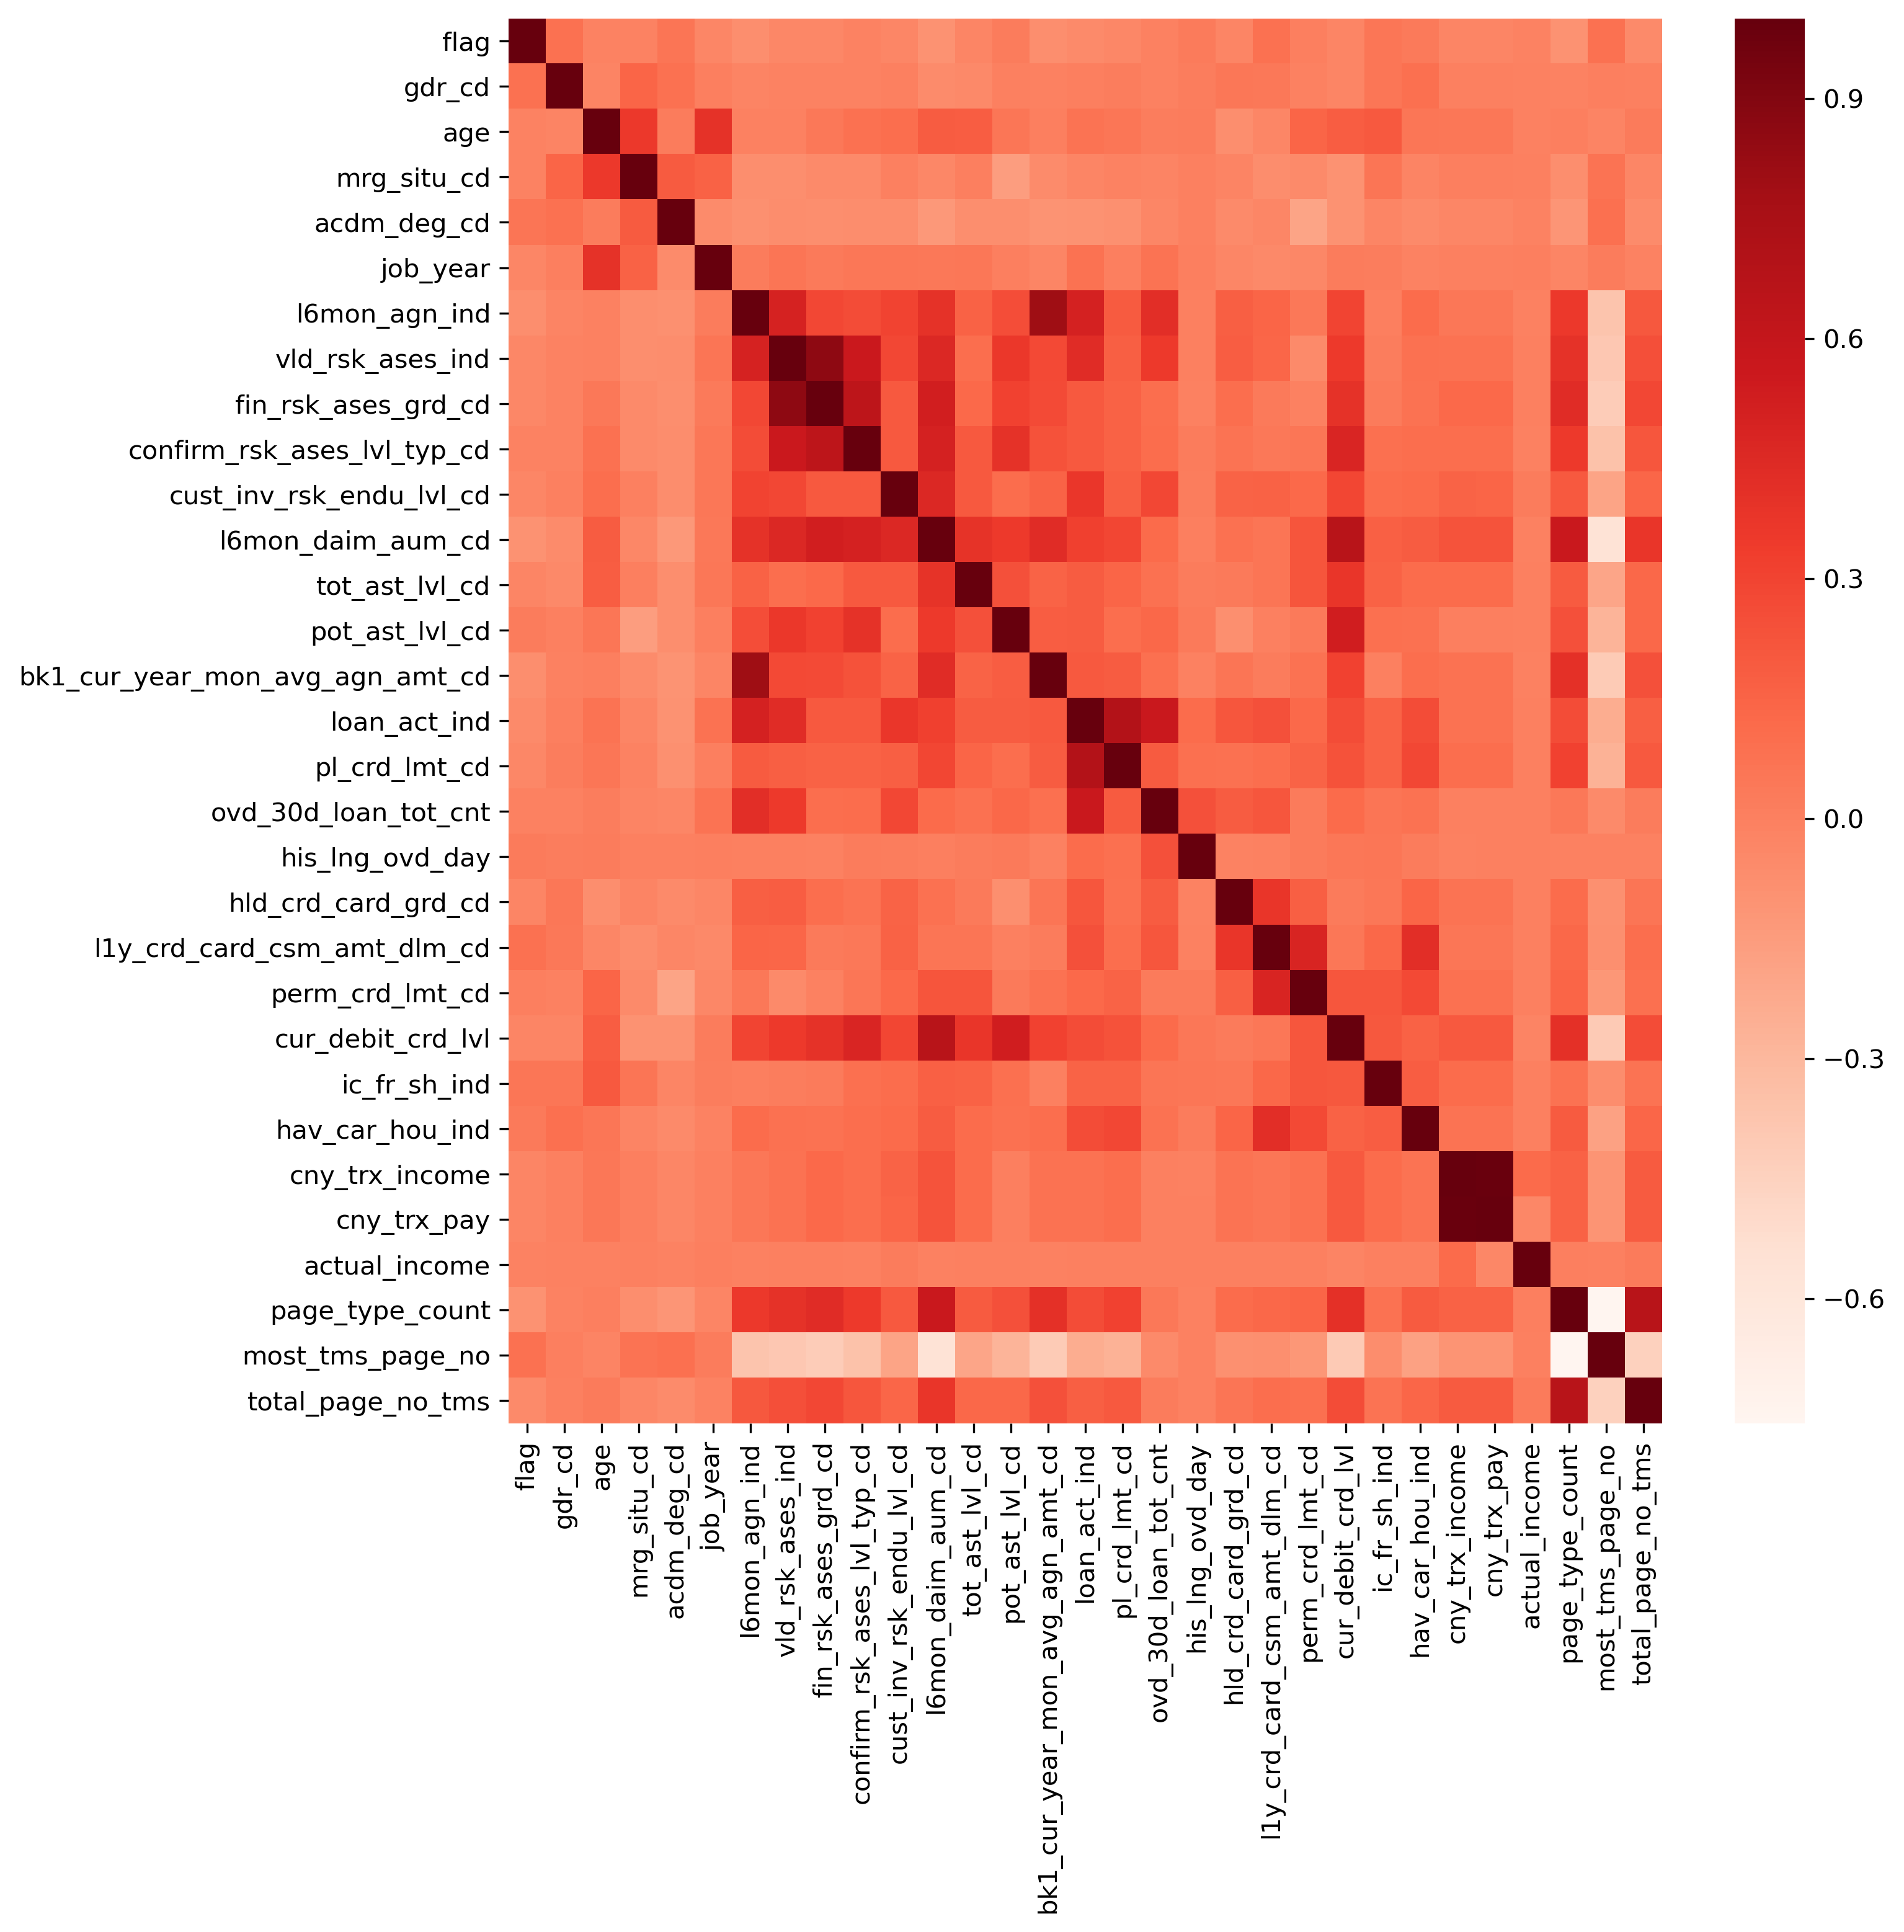

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10, 10), dpi = 300)
sns.heatmap(temp.corr(), cmap = 'Reds', annot = False) # temp.drop(['id'], axis = 1)
plt.show()

# 尝试预测

In [107]:
#train_DF_weneed = train_DF.drop(['id'] + noSelectName, axis = 1)
train_DF_weneed = train_DF.drop(['id', 'cny_trx_pay', 'cny_trx_income'], axis = 1)
train_DF_weneed.head()

,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_crd_lvl,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,0,M,41,B,Z,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,-1,0,3,10,0,0,17400.00,15000.00,2400.00,0,Undo,0
1,0,M,35,A,G,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,0,Undo,0
2,0,M,53,B,C,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,-1,0,7,40,0,0,105718.04,131158.00,-25439.96,6,CQA,35
3,0,F,41,B,Z,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,0,Undo,0
4,0,F,42,B,Z,3,0,0,-1,-1,1,5,-1,3,0,1,6,0,4,-1,0,2,20,3,2,79505.55,70416.04,9089.51,7,CQA,22


In [108]:
train_DF_weneed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   flag                             39923 non-null  int64  
 1   gdr_cd                           39923 non-null  object 
 2   age                              39923 non-null  int64  
 3   mrg_situ_cd                      39923 non-null  object 
 4   acdm_deg_cd                      39923 non-null  object 
 5   job_year                         39923 non-null  int64  
 6   l6mon_agn_ind                    39923 non-null  int64  
 7   vld_rsk_ases_ind                 39923 non-null  int64  
 8   fin_rsk_ases_grd_cd              39923 non-null  int64  
 9   confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 10  cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 11  l6mon_daim_aum_cd                39923 non-null  int64  
 12  tot_ast_lvl_cd    

In [109]:
strCol2 = [train_DF_weneed.columns.values.tolist()[1]] + \
    train_DF_weneed.columns.values.tolist()[3:5] + \
    [train_DF_weneed.columns.values.tolist()[27]]

strCol2

['gdr_cd', 'mrg_situ_cd', 'acdm_deg_cd', 'most_tms_page_no']

In [110]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoderLabel = LabelEncoder()

for sC in strCol2:
    train_DF_weneed[sC] = encoderLabel.fit_transform(train_DF_weneed[sC])

train_DF_weneed.head()

,flag,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,l6mon_agn_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_debit_crd_lvl,ic_fr_sh_ind,hav_car_hou_ind,cny_trx_income,cny_trx_pay,actual_income,page_type_count,most_tms_page_no,total_page_no_tms
0,0,1,41,1,7,3,0,0,-1,4,1,0,-1,6,0,0,0,0,0,-1,0,3,10,0,0,17400.00,15000.00,2400.00,0,22,0
1,0,1,35,0,5,4,0,0,-1,-1,1,0,-1,-1,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,0,22,0
2,0,1,53,1,2,9,1,1,3,3,6,7,-1,2,8,0,0,0,0,-1,0,7,40,0,0,105718.04,131158.00,-25439.96,6,2,35
3,0,0,41,1,7,0,0,0,-1,-1,1,0,-1,6,0,0,0,0,0,-1,0,1,10,0,0,0.00,0.00,0.00,0,22,0
4,0,0,42,1,7,3,0,0,-1,-1,1,5,-1,3,0,1,6,0,4,-1,0,2,20,3,2,79505.55,70416.04,9089.51,7,2,22


In [47]:
train_DF_weneed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   flag                             39923 non-null  int64  
 1   gdr_cd                           39923 non-null  int32  
 2   age                              39923 non-null  int64  
 3   mrg_situ_cd                      39923 non-null  int32  
 4   acdm_deg_cd                      39923 non-null  int32  
 5   job_year                         39923 non-null  int64  
 6   l6mon_agn_ind                    39923 non-null  int64  
 7   vld_rsk_ases_ind                 39923 non-null  int64  
 8   fin_rsk_ases_grd_cd              39923 non-null  int64  
 9   confirm_rsk_ases_lvl_typ_cd      39923 non-null  int64  
 10  cust_inv_rsk_endu_lvl_cd         39923 non-null  int64  
 11  l6mon_daim_aum_cd                39923 non-null  int64  
 12  tot_ast_lvl_cd    

In [48]:
train_DF_weneed['flag'].value_counts()

0    30970
1     8953
Name: flag, dtype: int64

In [109]:
# 从数据初探可以发现，'未来两年可能违约'标签类别分布不均，需对样本进行重取样
def resample(df):
    '''
    使样本'未来两年可能违约'标签的0，1项可以各占一半，以提高预测效果。sample()可以考虑添加random_state以便生成相同样本集
    df：数据源
    '''
    num = df['flag'].value_counts()[1]
    df_t = df[df.flag == 1]
    df_f = df[df.flag == 0].sample(frac=1)[0:num]
    df_balanced = pd.concat([df_t,df_f]).sample(frac=1).reset_index(drop=True)
#     print(df_balanced.未来两年可能违约.value_counts())
    return df_balanced

In [110]:
df_balanced = resample(train_DF_weneed)
df_balanced['flag'].value_counts()

1    8953
0    8953
Name: flag, dtype: int64

In [49]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.linear_model import LinearRegression,LassoCV,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score, \
                            precision_score,recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [75]:
def perfomance_clf(model,X,y,name=None):
    y_predict = model.predict(X)
    y_predict_prob = model.predict_proba(X)[:, 1]
    if name:
        print(name,':')
    print(f'accuracy score is: {accuracy_score(y,y_predict)}')
    print(f'precision score is: {precision_score(y,y_predict)}')
    print(f'recall score is: {recall_score(y,y_predict)}')
    print(f'auc: {roc_auc_score(y,y_predict_prob)}')
    print('- - - - - - ')


## 总的！

In [113]:
train_x.head()

,gdr_cd,age,mrg_situ_cd,acdm_deg_cd,job_year,ic_ind,fr_or_sh_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,perm_crd_lmt_cd,cur_credit_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,I12_mon_whl_tms,hav_car_hou_ind,cny_trx_income,cny_trx_pay,most_tms_page_no,total_page_no_tms
0,1,41,1,7,3,0,0,0,0,0,0,9,1,0,0,7,0,0,0,0,0,0,0,0,3,0,0,10,0,0,17400.00,15000.00,22,0
1,1,35,0,5,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10,0,0,0.00,0.00,22,0
2,1,53,1,2,9,0,0,1,935,1,5,8,6,7,0,3,8,0,0,0,0,0,0,0,7,0,0,40,6,0,105718.04,131158.00,2,35
3,0,41,1,7,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,1,0,0,10,0,0,0.00,0.00,22,0
4,0,42,1,7,3,1,1,0,0,0,0,0,1,5,0,4,0,1,6,0,4,0,0,0,2,0,0,20,0,2,79505.55,70416.04,2,22


In [114]:
xtrain, xtest, ytrain, ytest = train_test_split(train_x, train_y, test_size=0.2)    # random_state=42

# 分层k折交叉拆分器 - 用于网格搜索
cv = StratifiedKFold(n_splits=3,shuffle=True)

In [115]:
# 参数设定
log_params = {"penalty":['l1','l2'],
                 'C':[0.001*10**i for i in range(0,7)]}
# 参数搜索
log_gridsearch = GridSearchCV(LogisticRegression(solver='liblinear'),log_params,cv=cv,
                               n_jobs=-1,scoring='roc_auc',verbose=2,refit=True)
# 工作流管道
pipe_log = Pipeline([
        ('sc',StandardScaler()),    # 标准化Z-score
        ('pow_trans',PowerTransformer()),    # 纠偏
        ('log_grid',log_gridsearch)
        ])
# 搜索参数并训练模型
pipe_log.fit(xtrain,ytrain)
# 最佳参数组合
print(pipe_log.named_steps['log_grid'].best_params_)
# 训练集性能指标
perfomance_clf(pipe_log, xtrain, ytrain, name='train')
# 测试集性能指标
perfomance_clf(pipe_log, xtest, ytest, name='test')

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  1.7min finished


{'C': 1000.0, 'penalty': 'l2'}
train :
accuracy score is: 0.7831736489448307
precision score is: 0.6117788461538461
recall score is: 0.07157924342567852
auc: 0.5292846070111032
- - - - - - 
test :
accuracy score is: 0.7757044458359424
precision score is: 0.6143497757847534
recall score is: 0.0743756786102063
auc: 0.5301880020920151
- - - - - - 


## 原始

In [111]:
df_x = train_DF_weneed.drop(['flag'], axis = 1)
df_y = train_DF_weneed['flag']
xtrain, xtest, ytrain, ytest = train_test_split(df_x, df_y, test_size=0.2)    # random_state=42

# 分层k折交叉拆分器 - 用于网格搜索
cv = StratifiedKFold(n_splits=3,shuffle=True)

In [52]:
train_DF_weneed.flag.value_counts()

0    30970
1     8953
Name: flag, dtype: int64

In [66]:
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr)#, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

In [77]:
def logistic(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2020)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    prob = lr.predict_proba(X_test)
    
    perfomance_clf(lr, X_test, y_test)
    roc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
    print('roc ',roc)

    return (prob[:,1],y_test)

probs, y_test=logistic(df_x, df_y)

accuracy score is: 0.7820914214151534
precision score is: 0.47368421052631576
recall score is: 0.005175388154111558
auc: 0.6451586634767701
- - - - - - 
roc  0.6451586634767701


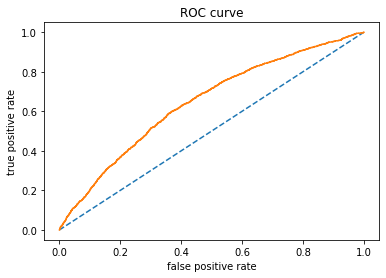

In [67]:
plot_roc(y_test,probs)

roc  0.5356180111683208


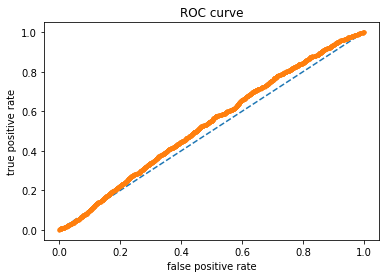

In [148]:
probs, y_test=logistic(train_x, train_y)
plot_roc(y_test,probs)

0.5528366216483207
accuracy score is: 0.782216656230432
precision score is: 0.0
recall score is: 0.0
auc: 0.5528366216483207
- - - - - - 


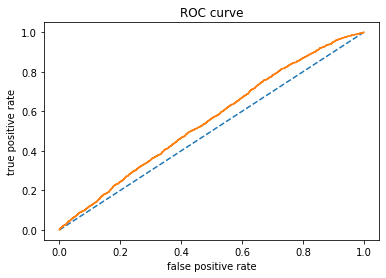

In [112]:
trainx, valx, trainy, valy = train_test_split(df_x, df_y, test_size=.2, random_state=2020)

clf = LogisticRegression(solver="lbfgs").fit(trainx, trainy)
pred_y = clf.predict_proba(valx)[:, 1]

rocrl=roc_auc_score(valy, pred_y)
print(rocrl)
perfomance_clf(clf, valx, valy)
plot_roc(valy, pred_y)

In [85]:
pred_y[:20]

array([0.12705548, 0.24615138, 0.26541418, 0.23279938, 0.27204041,
       0.18491699, 0.3065529 , 0.2127382 , 0.19552593, 0.25541196,
       0.17164863, 0.11172533, 0.25811039, 0.2160269 , 0.20868331,
       0.15060408, 0.17951897, 0.24956662, 0.15916665, 0.20095051])

In [88]:
model = RandomForestClassifier(n_estimators=220, class_weight = 'balanced').fit(trainx, trainy)
# {0: 1, 1:3}
predictionforest = model.predict_proba(valx)[:, 1]

rocrf=roc_auc_score(valy, predictionforest)
print('roc ',rocrf)
perfomance_clf(model, valx, valy)

roc  0.6646743622646498
accuracy score is: 0.7798371947401378
precision score is: 0.4735376044568245
recall score is: 0.097757331799885
auc: 0.6646743622646498
- - - - - - 


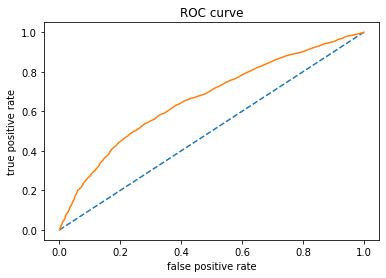

In [89]:
plot_roc(valy, predictionforest)

In [113]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, 
                            n_estimators = 1000,
                            class_weight = 'balanced',
                            #scale_pos_weight = 3,
                            #objective = 'binary:logistic',
                            #eval_metric = 'auc',
                           )

xgb_cfl.fit(trainx, trainy)
y_scorexgb = xgb_cfl.predict_proba(valx)[:,1]

rocxgb=roc_auc_score(valy, y_scorexgb)
print('roc ',rocxgb)
perfomance_clf(xgb_cfl, valx, valy)

roc  0.6844583408597144
accuracy score is: 0.7854727614276769
precision score is: 0.5128968253968254
recall score is: 0.2972972972972973
auc: 0.6844583408597144
- - - - - - 


In [92]:
y_scorexgb[:20]

array([1.4025193e-01, 4.9989596e-01, 3.8971875e-02, 3.3828557e-02,
       4.0680164e-01, 1.6799660e-01, 2.3085827e-01, 7.0410654e-02,
       4.6785843e-01, 2.4087204e-01, 3.4420237e-01, 8.6882487e-02,
       8.7551653e-02, 2.4179368e-01, 3.0712513e-03, 3.4840980e-03,
       2.0298018e-04, 1.5698877e-01, 2.5472043e-02, 4.8572910e-03],
      dtype=float32)

In [93]:
valy[:20].tolist()

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]

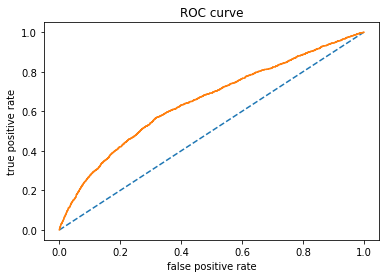

In [91]:
plot_roc(valy, y_scorexgb)

In [94]:
log_cfl = LogisticRegression()

param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', {0: 1, 1: 3}], 
            'C' : [0.1, 1, 10, 100, 1000]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(trainx, trainy)

best_parameters = CV_log_cfl.best_params_
print("The best parameters: ", best_parameters)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   33.9s finished


The best parameters:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}


roc  0.6548557724442204
accuracy score is: 0.6053850970569818
precision score is: 0.3067870826491516
recall score is: 0.6446233467510063
auc: 0.6548557724442204
- - - - - - 


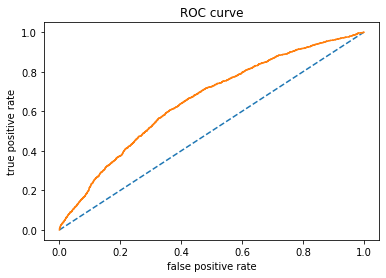

In [95]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(trainx, trainy)
#y_scoreLR = log_cfl.decision_function(valx)
y_scoreLR = log_cfl.predict_proba(valx)[:, 1]

rocLR=roc_auc_score(valy, y_scoreLR)
print('roc ',rocLR)
perfomance_clf(log_cfl, valx, valy)
plot_roc(valy, y_scoreLR)

In [96]:
y_scoreLR[:20]

array([0.38799365, 0.65457777, 0.52512876, 0.3043904 , 0.69625323,
       0.52420462, 0.70553957, 0.38965379, 0.52565576, 0.53025035,
       0.56659632, 0.52732894, 0.43736048, 0.47636193, 0.44024216,
       0.44869356, 0.28985306, 0.37657528, 0.228299  , 0.42271602])

In [97]:
rf_cfl = RandomForestClassifier(n_estimators=120).fit(trainx, trainy)

param_grid = {
            'n_estimators': [50, 100, 200],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'class_weight' :  ['balanced', {0: 1, 1: 3}],
            }

CV_rnd_cfl = GridSearchCV(estimator = rf_cfl, param_grid = param_grid, scoring = 'roc_auc', verbose = 10, n_jobs = -1)
CV_rnd_cfl.fit(trainx, trainy)

best_parameters = CV_rnd_cfl.best_params_
print("The best parameters: ", best_parameters)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6

The best parameters:  {'class_weight': {0: 1, 1: 3}, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


roc  0.6904906776909966
accuracy score is: 0.7833437695679399
precision score is: 0.6666666666666666
recall score is: 0.010350776308223116
auc: 0.6904906776909966
- - - - - - 


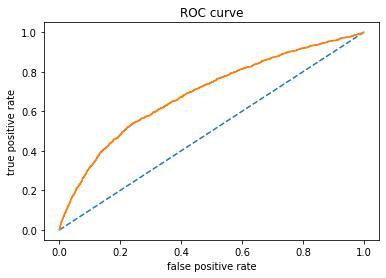

In [99]:
rf_cfl = RandomForestClassifier(n_estimators = best_parameters['n_estimators'],
                                max_features = best_parameters['max_features'], 
                                min_samples_leaf = best_parameters['min_samples_leaf'],  
                                class_weight = best_parameters['class_weight'],
                                min_samples_split = 5)
rf_cfl.fit(trainx, trainy)
y_score = rf_cfl.predict_proba(valx)[:,1]

rocRF=roc_auc_score(valy, y_score)
print('roc ',rocRF)
perfomance_clf(rf_cfl, valx, valy)

plot_roc(valy, y_score)

In [100]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)
xgb_cfl.fit(trainx, trainy)
y_pred = xgb_cfl.predict(valx)
y_score = xgb_cfl.predict_proba(valx)[:,1]

param_grid = {
            'n_estimators': [50, 100, 200],
            'class_weight' :  ['balanced', {0: 1, 1: 3}],
              }

CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='roc_auc', verbose = 2)
CV_xgb_cfl.fit(trainx, trainy)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters: ", best_parameters)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] class_weight=balanced, n_estimators=50 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........... class_weight=balanced, n_estimators=50, total=   4.1s
[CV] class_weight=balanced, n_estimators=50 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ........... class_weight=balanced, n_estimators=50, total=   3.4s
[CV] class_weight=balanced, n_estimators=50 ..........................
[CV] ........... class_weight=balanced, n_estimators=50, total=   3.9s
[CV] class_weight=balanced, n_estimators=100 .........................
[CV] .......... class_weight=balanced, n_estimators=100, total=   6.4s
[CV] class_weight=balanced, n_estimators=100 .........................
[CV] .......... class_weight=balanced, n_estimators=100, total=   7.0s
[CV] class_weight=balanced, n_estimators=100 .........................
[CV] .......... class_weight=balanced, n_estimators=100, total=   7.5s
[CV] class_weight=balanced, n_estimators=200 .........................
[CV] .......... class_weight=balanced, n_estimators=200, total=  13.9s
[CV] class_weight=balanced, n_estimators=200 .........................
[CV] .......... class_weight=balanced, n_estimators=200, total=  14.7s
[CV] class_weight=balanced, n_estimators=200 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.5min finished


The best parameters:  {'class_weight': 'balanced', 'n_estimators': 50}


roc  0.6860458318395654
accuracy score is: 0.7853475266123983
precision score is: 0.5308641975308642
recall score is: 0.12363427257044278
auc: 0.6860458318395654
- - - - - - 


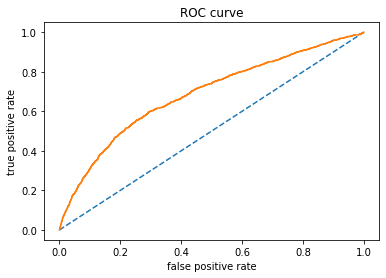

In [105]:
y_score1 = xgb_cfl.predict_proba(valx)[:,1]
rocxgb=roc_auc_score(valy, y_score1)
print('roc ',rocxgb)
perfomance_clf(xgb_cfl, valx, valy)
plot_roc(valy, y_score1)

roc  0.728626597042809
accuracy score is: 0.8072636192861615
precision score is: 0.6305483028720626
recall score is: 0.2777458309373203
auc: 0.728626597042809
- - - - - - 


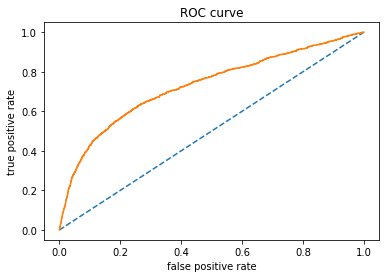

In [114]:
xgb_cfl2 = xgb.XGBClassifier(n_jobs = -1,
                             n_estimators = best_parameters['n_estimators'], 
                             class_weight = best_parameters['class_weight'])

xgb_cfl2.fit(trainx, trainy)

y_score2 = xgb_cfl2.predict_proba(valx)[:,1]
rocxgb=roc_auc_score(valy, y_score2)
print('roc ',rocxgb)
perfomance_clf(xgb_cfl2, valx, valy)
plot_roc(valy, y_score2)